In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [ ]:
#import the Dataset
iris = datasets.load_iris()


In [ ]:
X = iris.data[:,:2]
#we only take the first two features.
#We could avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [ ]:
#we create an instance of SVM and fit out the data. We do not scale our
#data since we want to plot the support vectors C=1.0
#SVM regularization parameter
svc = svm.SVC(kernel='linear',C=1, gamma='auto').fit(X,y)

In [ ]:
#create a mesh to plot in
x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max/x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

NameError: ignored

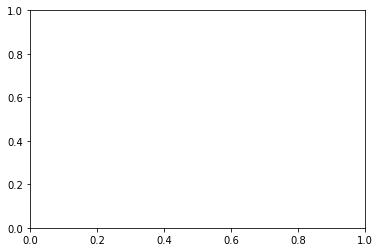

In [ ]:
'''plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx_ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,aplha=0.8)'''

In [ ]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(),xx.max())
plt.title("SVC with linear kernel")
plt.show()

In [ ]:
svc = svm.SVC(kernel='rbf',C=100, gamma=10).fit(X,y)  #c=1,100,1000 and gamma = auto,10,100

In [ ]:
 plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(),xx.max())
plt.title("SVC with rbf kernel")
plt.show()

In [ ]:
#create a dataset

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [ ]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [ ]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

In [ ]:
#independent and dependent features
X = df.iloc[:,:2]
y = df.Y

In [ ]:
y

In [ ]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
y_train

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')  #here we can use rbf also..
classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
df.head()

In [ ]:
#we need to find components for the polynomial kernel
#x1,x2,x1_square,x2_Square,x1*x2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head()

In [ ]:
#independent and dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df,x='X1_Square',y='X1_Square',z='X1*X2',color='Y')
fig.show()

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)